In [1]:
# Install libraries with shell commands
%conda install -c conda-forge opencv
%conda install -c conda-forge matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/junyi/Anaconda3/anaconda3/envs/cv_env

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following packages will be UPDATED:

  certifi               pkgs/main::certifi-2020.6.20-py37_0 --> conda-forge::certifi-2020.6.20-py37h2987424_2

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.10.14~ --> conda-forge::ca-cert

### Method-1 Using CascadeClassifier

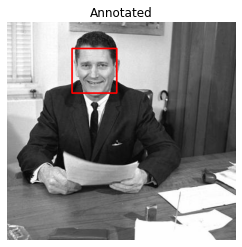

In [7]:
import cv2
import matplotlib.pyplot as plt
# Load the cascade
face_cascade = cv2.CascadeClassifier('//Users/junyi/Desktop/00UGA-M2/AIW/ComputerVision/Dataset/haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('/Users/junyi/Desktop/00UGA-M2/AIW/ComputerVision/Dataset/originalPics/2003/01/01/big/img_176.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
# Display the output
plt.imshow(img)
plt.title('Annotated')
plt.axis('off')

plt.show()

### Method-2 

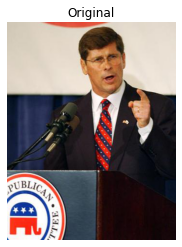

In [8]:
#########################
# @Author: Junyi ZHONG #
#########################

#========================
# Import Libraries
#========================
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import cv2

#------------------------
# Read Image
#========================
datasetPath = "/Users/junyi/Desktop/00UGA-M2/AIW/ComputerVision/Dataset/originalPics"
specialPath = "2002/07/19/big/img_18.jpg"
imPath = os.path.join(datasetPath, specialPath) 
img = cv2.imread(imPath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img.shape)

#------------------------
# show Image
#========================
plt.figure(num='FDDB')

# plt.subplot(221)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.show()

## read the annotation

In [16]:
# define Path

foldsPath = "/Users/junyi/Desktop/00UGA-M2/AIW/ComputerVision/Dataset/FDDB-folds"
foldsList  = sorted((os.listdir(foldsPath)))

# devide files
folds = foldsList[1::2] # Evens image names
ellipseList = foldsList[0::2] # Odds annotaions

#------------------------
# Find Corresponding Annotation Fold
#========================
# get the name without the extension
imName = os.path.splitext(specialPath)[0]
# this to find only the string which ends with ths pattern
imName = imName + '$'
# Fold Search Loop
for idx, fold in enumerate(folds):
    foldPath = os.path.join(foldsPath, fold)
    txtFile = open(foldPath, "r")
    for lin in txtFile:
        if(re.findall(imName,lin) != []):
            print('corresponding_fold: ',fold,'\nImage path: ', imName[:-1], lin)
            # Annotaion Fold
            annot_path = os.path.join(foldsPath,ellipseList[idx])
            # print(annot_path)
    # Close the txt file
    txtFile.close()
    
# Initialization
Annotaions = []
AnnotData = []
linIndex = -2
numFaces = 0

# Annot Search Loop
AnnotFile = open(annot_path, "r")
for idx, lin in enumerate(AnnotFile):
    if(re.findall(imName,lin) != []):
        linIndex = idx
    if (idx == (linIndex + 1) ):
        numFaces = int(lin)
        print("number of faces is: ", numFaces)
    if linIndex != -2:
        if idx in range(linIndex + 2, linIndex + 2 + numFaces):
            Annotaions.append(lin)
# print(Annotaions)
for Annotaion in Annotaions:
    AnnotData.append(list(filter(None, list(re.split("\s", Annotaion)))))
AnnotData = np.array(AnnotData, dtype=float )
AnnotData = np.floor(AnnotData[:,:-1]).astype(int)
print('First Face: \n   max_radius | min_radius | angle | center_x | center_y \n -------------------------------------------------------\n', AnnotData[0])

corresponding_fold:  FDDB-fold-10.txt 
Image path:  2002/07/19/big/img_18 2002/07/19/big/img_18

number of faces is:  1
First Face: 
   max_radius | min_radius | angle | center_x | center_y 
 -------------------------------------------------------
 [ 62  40   1 201  83]


### Parse the image with the annotaion

255 255.0


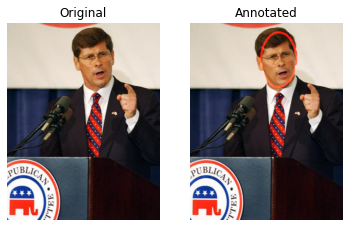

In [17]:
#------------------------
# Elliptic Annotation Drawing Function
#========================
def Elliptic(X, Y, xc, yc, Rmax, Rmin, theta):
    '''
    Function to Draw one Red Ellipses on Black Background
    Parameters:
    @Param: X : orginal image height.
    @Param: Y : orginal image width.
    @Param: xc, yc : Center coordinates of the Ellipse.
    @Param: Rmax, Rmin : max, and min Radius of the Ellipse.
    @Param: theta : Ellipse Rotation Angle 
    '''
    center_coordinates = (xc, yc) 
    axesLength = (Rmin, Rmax) 
    angle = theta
    startAngle = 0
    endAngle = 360
    
    # Red color in  RGB
    color = (255, 0, 0) 
    # Line thickness of 3 px 
    thickness = 3
    # Draw Black image
    image = np.zeros((X, Y, 3))
    # Using cv2.ellipse() method 
    # Draw a ellipse with red line borders of thickness of 5 px 
    result = cv2.ellipse(image, center_coordinates, axesLength, 
            angle, startAngle, endAngle, color, thickness) 
    
    return result 
#------------------------------------------------------------------
#------------------------
# Draw Anottations
#========================
Ellip = np.zeros_like(img)

for row in range(AnnotData.shape[0]):
    Ellip = np.maximum(Ellip, Elliptic(img.shape[0], img.shape[1], AnnotData[row, 3].astype(int),
                         AnnotData[row, 4].astype(int), AnnotData[row, 0].astype(int), AnnotData[row, 1].astype(int), AnnotData[row, 2].astype(int)))
print(img.max(), Ellip.max())
res = np.maximum(img, Ellip.astype(np.uint))
#------------------------
# show Result
#========================
plt.figure(num='FDDB2')

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(res)
plt.title('Annotated')
plt.axis('off')

plt.show()